In [66]:
import ROOT
import numpy as np
import time
import math
import matplotlib.pyplot as plt

nr_of_channels = int(3.6 * 1e6)
channels_per_module = int(15*30)
total_modules = int(nr_of_channels/channels_per_module)
threshold = 1


Average triggered channels: 1514665.046019
Number of noise above threshold in large W: 1514317.000000
[0.06993489 0.21865195 0.72902787 ... 0.63936061 0.02266992 0.69297059]
[0.59555412 0.48268917 0.18659952 ... 0.66820985 0.15876365 0.59635919]
[0.06146771 0.66538842 0.83528112 ... 0.38254825 0.48434287 0.03771917]
[0.6142174  0.08879454 0.94679172 ... 0.85078386 0.98879743 0.64759215]
[0.15344727 0.62643784 0.47546265 ... 0.28065682 0.12060888 0.88726503]
[0.6159696  0.90268975 0.60105005 ... 0.15234133 0.95480247 0.54851916]
[0.96813466 0.37173223 0.91538938 ... 0.41852346 0.99302752 0.16982547]
[0.58095828 0.6969398  0.76297251 ... 0.99920565 0.55713498 0.58046679]
[0.14234682 0.25633836 0.90674193 ... 0.88031452 0.66749716 0.76113162]
[0.94154001 0.46480138 0.71509753 ... 0.65452204 0.227319   0.54408815]
Exact number of noise activated channels: 189284.000000
Estimated number of noise activated channels: 189290.428571


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Signal_gaus


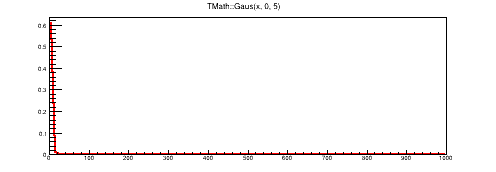

In [113]:
global_counter = 0
low = 0
high = 1000
noise = ROOT.TF1("noise_gauss", "TMath::Gaus(x, 0, 5)", low, high)
c1 = ROOT.TCanvas ("Signal_gaus", "Gauss", 500, 200)
noise.Draw()
c1.Draw()
#integrate normal dist. to get exact prob. above threshold and multiply with channel nr to get avg. of triggered channels
mean = nr_of_channels * noise.Integral(threshold, high)/noise.Integral(low, high)/2
mean2 = nr_of_channels * noise.Integral(threshold, high)*2
print ("Average triggered channels: %f" % mean)

#self._prng = ROOT.TRandom3(time.time_ns())
global_counter += 1
prng = ROOT.TRandom3(int(time.time()) + global_counter)


"""The first return value is the exact number of noise activated channels in the small window and
    the second return value is the estimated number of noise activated channels in the small window. (estimated from large window)
    (both results are in small window, both results are noise above threshold)
    noise_exact, noise_est = noise.generate()"""
# Large time window 25ns
# Small time window 3.125ns

total = prng.Poisson(mean) # number of noise activated channels, so above threshold in large window in this run.
print ("Number of noise above threshold in large W: %f" %total)
narrow_exact = 0
if total <= 5:
    for i in range(total):
        if prng.Uniform(25) < 3.125: 
            narrow_exact += 1
else:
    narrow_exact = (np.random.rand(total) < 0.125).sum()  # 3.125/25 = 0.125

for i in range(10):
    print (np.random.rand(total))

noise_per_time = (total - narrow_exact)/(25 - 3.125)
estimate = 3.125 * noise_per_time

print ("Exact number of noise activated channels: %f" % narrow_exact)
print ("Estimated number of noise activated channels: %f" % estimate)




Landau dist. 1: 427.221771
Landau dist. 2: 160.636582
Landau dist. 3: 321.658184
Landau dist. 4: 178.841819
Landau dist. 5: 118.392902
Landau dist. 6: 189.846378
Landau dist. 7: 112.362872
Landau dist. 8: 90.590420
Landau dist. 9: 121.871238
Landau dist. 10: 103.193388
Signal count: 15012
Activated channels: 10695
Loss in signal = 4317.000000


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Signal_Landau


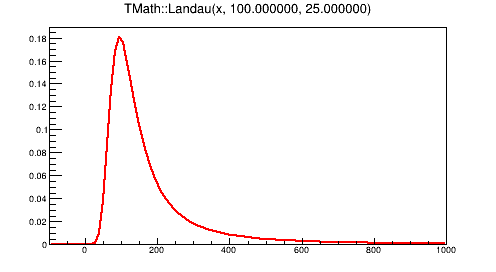

In [64]:
#expected number of particles reaching the detector 
real_expected_voltage = 100
guess_expected_voltage = 100
expected_count = 15*1e3
global_counter = 0
low = -100
high = 1000
threshold = threshold
expected_voltage = real_expected_voltage
signal_func = ROOT.TF1("sth", "TMath::Landau(x, %f, %f)" % (guess_expected_voltage, guess_expected_voltage/4), low, high)

fraction_above = signal_func.Integral(threshold, high)/signal_func.Integral(low, high)
#self._prng = ROOT.TRandom3(time.time_ns())
global_counter += 1
prng = ROOT.TRandom3(int(time.time()) + global_counter)

c = ROOT.TCanvas ("Signal_Landau", "Landau", 500, 300)
signal_func.Draw()
c.Draw()
"""The paramater is the expected number of particles that reach the detector.
    The first return value is the number of particles that reached the detector and
    the second return value is the number of activated channels.
    signal_real_total, signal_above = signal.generate(30)"""

signal_count = prng.Poisson(expected_count)

for i in range (10):
    print ("Landau dist. %d: %f" %(i+1, prng.Landau(expected_voltage, expected_voltage/4)))
    
above_threshold_count = 0
sigma = expected_voltage/4
for i in range(signal_count):
    if prng.Landau(expected_voltage, sigma) > threshold: # 1/4 is just the refernce 25/100
        above_threshold_count += 1
#return signal_count, above_threshold_count

print("Signal count: %d" %signal_count)
print("Activated channels: %d" %above_threshold_count)
print ("Loss in signal = %f" % (signal_count-above_threshold_count))